In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3, Xception, VGG19, MobileNet, EfficientNetB4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

#print(tf.config.list_physical_devices('GPU'))
#print(tf.config.list_physical_devices('CPU'))

IMG_HEIGHT, IMG_WIDTH = 227, 227
BATCH_SIZE = 32
EPOCHS = 500
NUM_CLASSES = 10

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

p1 = '/Users/pranav/Downloads/MLdatasets/Cross-validation1/Train'
p2 = '/Users/pranav/Downloads/MLdatasets/Cross-validation1/Test'

train_generator = train_datagen.flow_from_directory(
    p1,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    p1,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    p2,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

"""
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')
])
"""

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                    MaxPooling2D(pool_size=2),
                    Conv2D(16, 3, activation='relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(32, 3, activation='relu'),
                    MaxPooling2D(pool_size=2),
                    GlobalAveragePooling2D(),
                    Dense(NUM_CLASSES, activation='softmax', name='output_layers')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=[earlystop])

Found 9301 images belonging to 10 classes.
Found 2319 images belonging to 10 classes.
Found 2911 images belonging to 10 classes.


2023-07-23 21:57:04.347241: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-07-23 21:57:04.347271: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-23 21:57:04.347279: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-23 21:57:04.347317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-23 21:57:04.347334: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/500


2023-07-23 21:57:04.930475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


290/291 [============================>.] - ETA: 0s - loss: 1.8625 - accuracy: 0.3531

2023-07-23 21:57:17.658101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


291/291 [==============================] - 15s 46ms/step - loss: 1.8608 - accuracy: 0.3536 - val_loss: 1.5913 - val_accuracy: 0.4623
Epoch 2/500
291/291 [==============================] - 13s 44ms/step - loss: 1.5076 - accuracy: 0.4645 - val_loss: 1.4295 - val_accuracy: 0.5071
Epoch 3/500
291/291 [==============================] - 13s 45ms/step - loss: 1.3625 - accuracy: 0.5251 - val_loss: 1.2880 - val_accuracy: 0.5485
Epoch 4/500
291/291 [==============================] - 13s 43ms/step - loss: 1.2454 - accuracy: 0.5702 - val_loss: 1.2337 - val_accuracy: 0.6003
Epoch 5/500
291/291 [==============================] - 13s 43ms/step - loss: 1.1351 - accuracy: 0.6054 - val_loss: 1.1032 - val_accuracy: 0.6218
Epoch 6/500
291/291 [==============================] - 13s 43ms/step - loss: 1.0458 - accuracy: 0.6372 - val_loss: 0.9755 - val_accuracy: 0.6701
Epoch 7/500
291/291 [==============================] - 12s 43ms/step - loss: 0.9546 - accuracy: 0.6728 - val_loss: 0.9168 - val_accuracy: 0.69

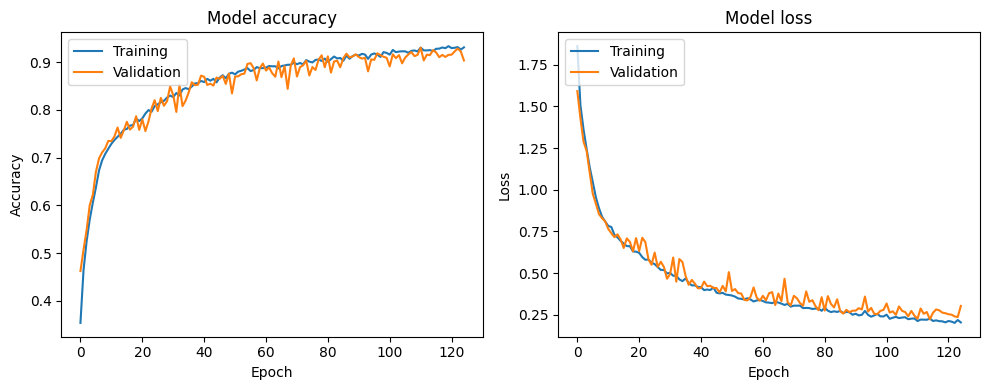

91/91 [==============================] - 3s 27ms/step - loss: 0.2686 - accuracy: 0.9127
Test Accuracy: 0.9127447605133057
Test Loss: 0.2685728371143341


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
#plt.suptitle(i, fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
    
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

In [3]:
model.save('90plus_accuracy.keras')

In [ ]:
############################

In [4]:
model2 = tf.keras.Sequential([Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                              MaxPooling2D(pool_size=2),
                              Conv2D(64, 3, activation='relu'),
                              MaxPooling2D(pool_size=2),
                              Conv2D(128, 3, activation='relu'),
                              MaxPooling2D(pool_size=2),
                              GlobalAveragePooling2D(),
                              Dense(NUM_CLASSES, activation='softmax', name='output_layers')])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

history2 = model2.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=[earlystop])

Epoch 1/500


2023-07-23 22:27:05.629809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


291/291 [==============================] - ETA: 0s - loss: 1.6378 - accuracy: 0.4250

2023-07-23 22:27:24.915797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


291/291 [==============================] - 21s 72ms/step - loss: 1.6378 - accuracy: 0.4250 - val_loss: 1.2922 - val_accuracy: 0.5645
Epoch 2/500
291/291 [==============================] - 21s 72ms/step - loss: 1.1677 - accuracy: 0.6026 - val_loss: 1.1119 - val_accuracy: 0.6197
Epoch 3/500
291/291 [==============================] - 21s 71ms/step - loss: 1.0148 - accuracy: 0.6495 - val_loss: 0.9181 - val_accuracy: 0.6878
Epoch 4/500
291/291 [==============================] - 20s 70ms/step - loss: 0.8691 - accuracy: 0.6986 - val_loss: 0.8789 - val_accuracy: 0.6839
Epoch 5/500
291/291 [==============================] - 21s 71ms/step - loss: 0.7685 - accuracy: 0.7304 - val_loss: 0.7300 - val_accuracy: 0.7581
Epoch 6/500
291/291 [==============================] - 20s 70ms/step - loss: 0.6838 - accuracy: 0.7628 - val_loss: 0.6978 - val_accuracy: 0.7594
Epoch 7/500
291/291 [==============================] - 20s 69ms/step - loss: 0.6278 - accuracy: 0.7808 - val_loss: 0.6732 - val_accuracy: 0.76

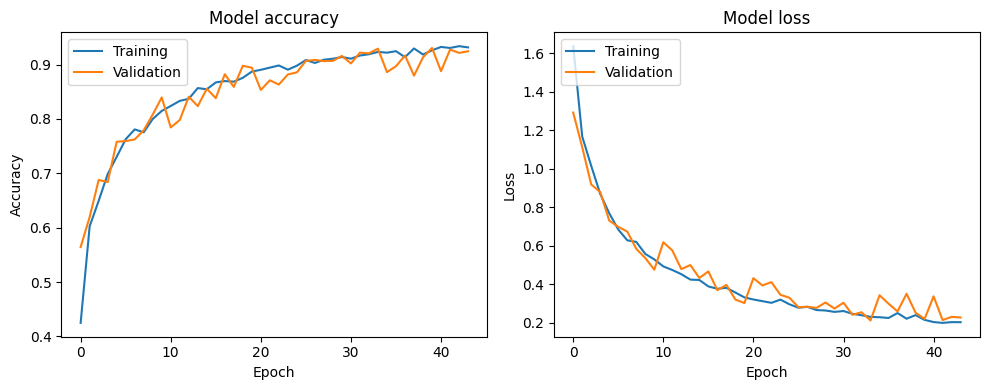

91/91 [==============================] - 3s 27ms/step - loss: 0.2686 - accuracy: 0.9127
Test Accuracy: 0.9127447605133057
Test Loss: 0.2685728669166565


<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
#plt.suptitle(i, fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
    
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

In [6]:
model2.save('90plus_32-64-128.keras')

In [ ]:
############################

In [7]:
model3 = tf.keras.Sequential([Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                              MaxPooling2D(pool_size=2),
                              Conv2D(32, 3, activation='relu'),
                              MaxPooling2D(pool_size=2),
                              Conv2D(64, 3, activation='relu'),
                              MaxPooling2D(pool_size=2),
                              GlobalAveragePooling2D(),
                              Dense(NUM_CLASSES, activation='softmax', name='output_layers')])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

history3 = model3.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=[earlystop])

Epoch 1/500
  1/291 [..............................] - ETA: 1:34 - loss: 2.2943 - accuracy: 0.1250

2023-07-23 22:45:38.077057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


291/291 [==============================] - ETA: 0s - loss: 1.8050 - accuracy: 0.3568

2023-07-23 22:45:48.344869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


291/291 [==============================] - 12s 41ms/step - loss: 1.8050 - accuracy: 0.3568 - val_loss: 1.5961 - val_accuracy: 0.4541
Epoch 2/500
291/291 [==============================] - 12s 40ms/step - loss: 1.4257 - accuracy: 0.5078 - val_loss: 1.5277 - val_accuracy: 0.4377
Epoch 3/500
291/291 [==============================] - 12s 41ms/step - loss: 1.2309 - accuracy: 0.5785 - val_loss: 1.1543 - val_accuracy: 0.6041
Epoch 4/500
291/291 [==============================] - 12s 42ms/step - loss: 1.1181 - accuracy: 0.6194 - val_loss: 1.0371 - val_accuracy: 0.6537
Epoch 5/500
291/291 [==============================] - 12s 40ms/step - loss: 1.0207 - accuracy: 0.6451 - val_loss: 1.0772 - val_accuracy: 0.6399
Epoch 6/500
291/291 [==============================] - 12s 39ms/step - loss: 0.9677 - accuracy: 0.6689 - val_loss: 0.9192 - val_accuracy: 0.6865
Epoch 7/500
291/291 [==============================] - 12s 39ms/step - loss: 0.9191 - accuracy: 0.6807 - val_loss: 0.8550 - val_accuracy: 0.72

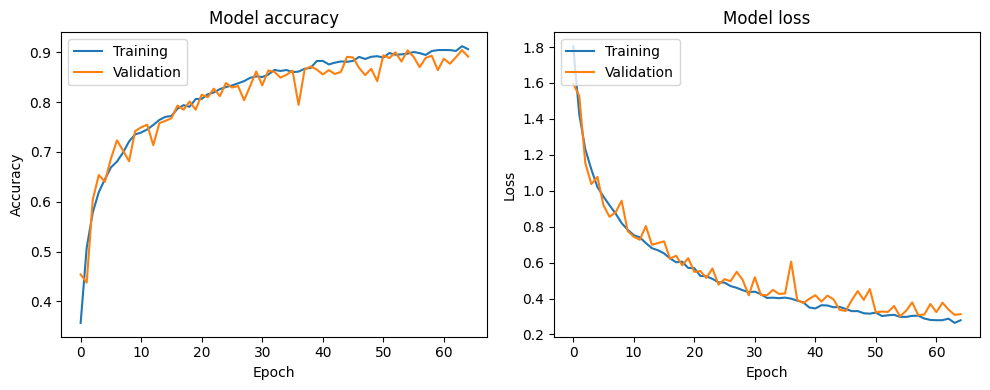

91/91 [==============================] - 2s 27ms/step - loss: 0.2686 - accuracy: 0.9127
Test Accuracy: 0.9127447605133057
Test Loss: 0.2685728371143341


<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
#plt.suptitle(i, fontsize=14)

plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
    
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

In [9]:
model3.save('90plus_16-32-64.keras')

In [ ]:
############################